In [0]:
!pip install git+https://www.github.com/keras-team/keras-contrib.git
!pip install keras==2.2.4
!pip install git+https://github.com/apple/coremltools.git@master
  # hello

In [0]:
import sys
import PIL.Image
import os
from IPython.utils import io

In [0]:
# Install git lfs first so we can get download model checkpoints
!curl -s https://packagecloud.io/install/repositories/github/git-lfs/script.deb.sh | sudo bash
!apt-get install git-lfs
!git lfs install

In [0]:
!git clone https://github.com/fritzlabs/fritz-models.git

In [0]:
# Add the Fritz Style Transfer package to your python path
sys.path.append('/content/fritz-models/style_transfer/')

In [0]:
!mkdir fritz-models/style_transfer/data/

In [7]:
!cd fritz-models/style_transfer && pwd

/content/fritz-models/style_transfer


In [8]:
!ls

fritz-models  sample_data


In [0]:
#!mv property-styling-marbella.jpg fritz-models/style_transfer/data/style_image.jpg
!mv 15piZeTpZ9Nf_EMD6OZNegO2G8VUaDQFP fritz-models/style_transfer/data/style_image.jpg

In [0]:
!cd data
#!wget http://www.marbellapropertystyling.com/wp-content/uploads/2016/03/property-styling-marbella.jpg
!wget https://drive.google.com/file/d/1lWM_OJbfGDOg8l7Ezx_vRmIU0Ya9IeVC/view?usp=sharing

In [11]:
!ls -l fritz-models/style_transfer/data/

total 2531412
drwxrwxr-x 69 7135 7135       4096 Mar 17  2009 Images
-rw-r--r--  1 root root 2592010240 Jun 27  2009 indoorCVPR_09.tar
-rw-r--r--  1 root root     137115 Mar  6 10:08 style_image.jpg


In [0]:
# training_data_url = "http://images.cocodataset.org/zips/val2017.zip"
training_data_url = "http://groups.csail.mit.edu/vision/LabelMe/NewImages/indoorCVPR_09.tar"

!cd fritz-models/style_transfer/data/ && wget $training_data_url

print("Unzipping")


In [0]:

    #!unzip -o -d fritz-models/style_transfer/data/ fritz-models/style_transfer/data/val2017.zip
    #!tar -xv -o -d fritz-models/style_transfer/data/ -s fritz-models/style_transfer/data/indoorCVPR_09.tar
!tar -xvf fritz-models/style_transfer/data/indoorCVPR_09.tar -C fritz-models/style_transfer/data/

print(f"Finished Downloading data")

In [0]:
!cd fritz-models/style_transfer/data/Images && find . -name *.jpg | xargs -I {} mv -iv {} .


In [25]:
!ls fritz-models/style_transfer/data/Images/

 000106949d.jpg
 00036_NiagaraFalls4.jpg
 0009.jpg
 0012.jpg
 0020.jpg
 0021550.jpg
 003_Albany_Grocery_Store_Interior.jpg
 007330543b.jpg
 008_laundry_fullsize.jpg
 019_e_in_chocolate_aisle_at_auchan_supermarche_in_dieppe.jpg
 0207_closet.jpg
 023_supermarkt.jpg
 02ORBITEGR.jpg
 0307280855117les8.jpg
 0341_treppe.jpg
 0433_04_2255837_a.jpg
 05_03_07_supermarkt.jpg
 050908Library055_1.jpg
 051220_nft2.jpg
 056_2.jpg
 06_Greenough_Laundry_Room_and_Bike_Racks_MA.jpg
 070707_15291.jpg
 075381028905.jpg
 075381028998.jpg
 0797089377f6f45f3278042aa1d0631d.jpg
 08082003_aisle.jpg
 082806_the_stash_closet.jpg
 08.jpg
 0gefHLp8G0hS8ab5T1BKhdescQ3UG016_800x600.jpg
 0LG_0006_Layer_3.jpg
 100_0067_IMG.jpg
 100_0086.jpg
 100_0125kleinNEW.jpg
 100_0253_vn4u.jpg
 100_1414.jpg
 10022250_2T.jpg
 100_2490_357122904_std.jpg
 100_2491_357123028_std.jpg
 100_8470bbb.jpg
 101.jpg
 102_1__2.jpg
 106598451_eba244869f.jpg
 109_0940.jpg
 10_auditorium_1__1.jpg
 111528037_7494ae335f.jpg
 1115735139.jpg
 1115903

In [0]:
!python fritz-models/style_transfer/create_training_dataset.py \
--output fritz-models/style_transfer/data/training_images_spaces.tfrecord \
--image-dir fritz-models/style_transfer/data/Images/


In [0]:
!mv create_training_dataset.py fritz-models/style_transfer

In [0]:
!cd fritz-models/style_transfer/ && export PYTHONPATH=`pwd` && python style_transfer/train.py \
--training-image-dset data/training_images_spaces.tfrecord \
--style-images data/style_image.jpg \
--model-checkpoint data/white_025.h5 \
--image-size 256,256 \
--alpha 0.25 \
--num-iterations 500 \
--batch-size 12 \
--style-weight 0.00001 \
--fine-tune-checkpoint example/starry_night_256x256_025.h5

In [0]:
#!rm fritz-models/style_transfer/data/indoorCVPR_09.tar.2

!pwd && ls

In [0]:
#@title Default title text
#@title Build Model
import style_transfer.models
import keras
from PIL import Image
from matplotlib import pyplot
import requests
from io import BytesIO
import numpy
from IPython.display import Markdown



def download_image(image_url):
    response = requests.get(image_url)
    return PIL.Image.open(BytesIO(response.content))


def run_prediction(model, image, image_size):
    image = image.resize(image_size)
    input_data = numpy.array(image)[None, :, :, :3] - 120.0
    output_data = model.predict(input_data)
    return PIL.Image.fromarray(output_data[0].astype('uint8'))


# Clear the keras session of the training we just did
keras.backend.clear_session()
# Load the model
image_size = (1080, 1080) #@param {type:"raw"}
model = style_transfer.models.StyleTransferNetwork.build(
    image_size,
    alpha=0.25, 
    checkpoint_file='/content/fritz-models/style_transfer/data/white_025.h5'
)

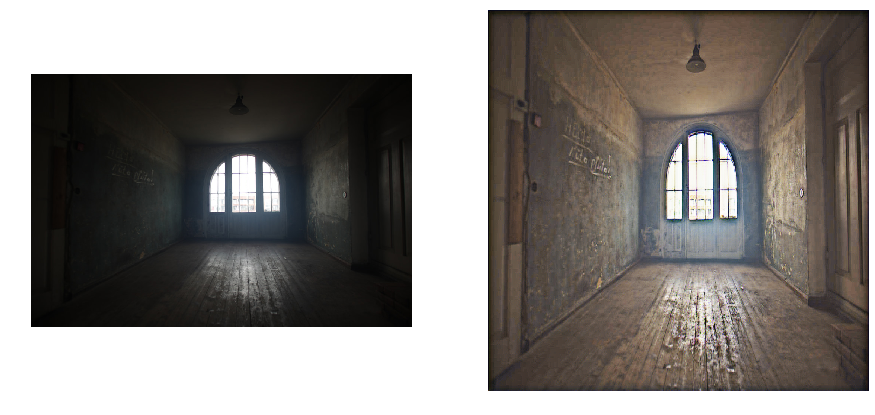

In [0]:
#@title Stylize an Image!
image_url = 'https://farm4.staticflickr.com/3319/3513886584_622c883114_b_d.jpg' #@param {type:"string"}
image = download_image(image_url)
stylized_image = run_prediction(model, image, image_size)

fig, ax = pyplot.subplots(1,2);
fig.set_size_inches(15, 7)
ax[0].axis('off')
ax[1].axis('off')

ax[0].imshow(image);
ax[1].imshow(stylized_image);

In [0]:
# Download the model
from google.colab import files
files.download('/content/fritz-models/style_transfer/data/white_025.h5')

In [0]:
!python fritz-models/style_transfer/convert_to_coreml.py \
--keras-checkpoint fritz-models/style_transfer/data/white_025.h5 \
--alpha 0.25 \
--image-size 640,640 \
--coreml-model fritz-models/style_transfer/data/white_025.mlmodel

In [0]:
# Download the mlmodel
from google.colab import files
files.download('/content/fritz-models/style_transfer/data/white_025.mlmodel')

In [0]:
!pip install fritz

In [0]:
!fritz config update \
    --api-key 657f37ac4d864fc08b8c7f717022880d \
    --project-id 4f623d8197e146288a1daf211f2f3e62

In [0]:
#Fritz has to configure first
#!fritz configure
!fritz model upload fritz-models/style_transfer/data/white_025.mlmodel

In [0]:
!ls